# IMDb Binary Classification Example

From the book ["Deep Learning with Python"](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet

Two-class classification or binary classification is some of the most common types of machine learning problems an analysts will encounter in the real world. I have used this method in sales operations to look at what sales opportunities are likley to close to seeing when a customer is likely to leave in what is know as churn.

### The IMDb Data-Set

The Internet Movie Database is an online database that houses information about movies, televsion shows and video games. This dataset has a set of 50K highly polarized reviews. The reviews are spilt into 25K reviews for training and 25K for testing. Each set contains a review mix of 50% positive and 50% negative.

This data has already been preprocessed. The reviews have been turned into sequences of integers. Each integer repersents a word in a dictionary.

#### Load the data

This data comes prepackaged with Keras. You can load the code with the below:

In [4]:
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

So the `num_words = 10000` takes the top 10K words by frequency in the training data, basically meaning the rare words will be removed. This means that our data will more of a managable size to work with.

#### Take A Quick Look

`train_data` and `test_data` are lists of reviews. So each review is a list of word indices with an encoding of a sequence of words. The labels `train_labels` and `test_labels` are lists of 0s and 1s where 0 stands for *negative* review and 1 is a *positive* review.

In [6]:
train_data[2]

[1,
 14,
 47,
 8,
 30,
 31,
 7,
 4,
 249,
 108,
 7,
 4,
 5974,
 54,
 61,
 369,
 13,
 71,
 149,
 14,
 22,
 112,
 4,
 2401,
 311,
 12,
 16,
 3711,
 33,
 75,
 43,
 1829,
 296,
 4,
 86,
 320,
 35,
 534,
 19,
 263,
 4821,
 1301,
 4,
 1873,
 33,
 89,
 78,
 12,
 66,
 16,
 4,
 360,
 7,
 4,
 58,
 316,
 334,
 11,
 4,
 1716,
 43,
 645,
 662,
 8,
 257,
 85,
 1200,
 42,
 1228,
 2578,
 83,
 68,
 3912,
 15,
 36,
 165,
 1539,
 278,
 36,
 69,
 2,
 780,
 8,
 106,
 14,
 6905,
 1338,
 18,
 6,
 22,
 12,
 215,
 28,
 610,
 40,
 6,
 87,
 326,
 23,
 2300,
 21,
 23,
 22,
 12,
 272,
 40,
 57,
 31,
 11,
 4,
 22,
 47,
 6,
 2307,
 51,
 9,
 170,
 23,
 595,
 116,
 595,
 1352,
 13,
 191,
 79,
 638,
 89,
 2,
 14,
 9,
 8,
 106,
 607,
 624,
 35,
 534,
 6,
 227,
 7,
 129,
 113]

In [7]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

We should not have a word value that goes over 10K in our `train_data`

In [8]:
max([max(sequence) for sequence in train_data])

9999

What are these numbers in english? Below is a decoder.

In [9]:
word_index = imdb.get_word_index() #word_index is a dictionary mapping
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
reverse_word_index.get(i - 3, '?') for i in train_data[2])

In [10]:
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

### Data Preperation

We can not use list of integers into a neural network. These lists need to be transformed into tensors. There are a couple of ways in which to do this.
1. Pad the lists to ensure that they are all the same length. We would then use that as the first layer in the network. This would be known as an Embedding Layer.
2. We could One-hot encode the lists to turn them into vectors of 0's and 1's. Basically if we take the sequence [3, 5] into a 10K dimensional vector that would be all 0's with exception of of indices 3 and 5, which would be 1s. We could then use the first layer in the network as a Dense Layer.

We going to move forward with 2. Vectorize the data.

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) #all zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Indices of results to 1's
    return results
# Vectorize train and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Lets see what the samples look like now.

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorize labels as well.

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Construct The Network

Our input data is vectors, and the labels are scalars (1's and 0's). A type of network that does well on this problem is a simple stack of fully connected dense layers with relu activations.

#### Hold on! What is / are relu activations?

ReLU, or Rectitified Linear Unit is one of the most commonly used activation functions in deep learning models. Basically the function returns 0 if it gets any negative input. 

Any positive value *x* it returns that value back.

An activation function serves two purposes:
1. This helps the model account for interaction effects. *Interactive effects* are when one variable affects a prediction differently depending on the value of another variable. 
2. It also helps the model account for non-linear effects. The effect of increasing the predictor by one is different at different values of that predictor.

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

We are passing an arguement to each Dense Layer (16). This is the number of hidden units of the layer. A hidden layer is the dimesnion of the representation space of the layer.

Now, back to ReLU activation. The relu implements the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

With 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, the dot product with `W` will project the input data onto a 16-dimensional repersentation space, we also add the bias vector `b`and apply the ReLU operation.

Bascially we are giving our young model some freedom with learning internal representaitons. Having more hidden units allows your network to learn more complex representations. This comes at a cost. This could make a network more computationally expensive and could lead to learning unwanted patterns that yes, will help on the training data, but hurt when it comes to test time.

We have to key architecture decisions to be made about the stack of dense layers:
1. How many layers do we use?
2. How many hidden units to chose for each layer.

So, for this dataset we are going to use two intermediate layers and a 3rd layer that will output the scalar prediction of the sentiment of the current review.

The intermediate layers will use ReLU as their activation function, and for the final layer we will use a sigmoid activation to produce a probaility between 0 and 1 for how likely the review is to be positive.

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Now we need to pick a **loss function** and an **optimizer** Since we are facing a binary classfication problem and the output of the network is a probability. It would be best to use `binary_crossentropy` loss. This is not the only choice. We could also use `mean_squared_error`. But crossentropy is usually the best choice when you are dealing with models that output probabilties. Crossentropy is a quantity from the field of Information Theory that measures the "distance" between probaility distributions.

In [16]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Validation

To monitor the accuracy on our training of the model on data it has never seen before we are going to create a validation set by setting apart 10K samples from the original training data.

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now we will train our model for 20 epochs. This means 20 interations over all samples in the x_train and y_train tensors. In mini-batches of 512 samples. At this time we will monitor loss and accuracy on the 10K samples that we set apart.

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 302us/step - loss: 0.4977 - acc: 0.7951 - val_loss: 0.3717 - val_acc: 0.8724
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2958 - acc: 0.9044 - val_loss: 0.2990 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3084 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1742 - acc: 0.9434 - val_loss: 0.2830 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3094 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0970 - acc: 0.9710 - val_loss: 0.3146 - val

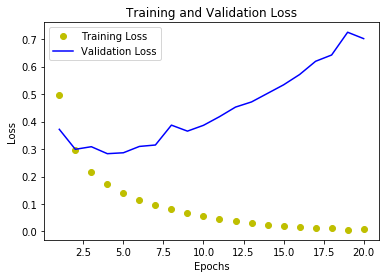

In [28]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'yo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()